In [1]:
import pandas as pd
df=pd.read_csv('tmdb_5000_movies.csv')

In [2]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [3]:
#i need only the columns of budget, genre, popularity, runtime, vote_average, vote_count, release_date
df=df[['budget','genres','popularity','runtime','vote_average','vote_count','release_date','revenue']]
df.head()

,budget,genres,popularity,runtime,vote_average,vote_count,release_date,revenue
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",150.437577,162.0,7.2,11800,2009-12-10,2787965087
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",139.082615,169.0,6.9,4500,2007-05-19,961000000
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",107.376788,148.0,6.3,4466,2015-10-26,880674609
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",112.312950,165.0,7.6,9106,2012-07-16,1084939099
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",43.926995,132.0,6.1,2124,2012-03-07,284139100


In [4]:
import json
df['genres'] = df['genres'].apply(json.loads)

# Extract only the 'name' values from the genre column
df['genre_names'] = df['genres'].apply(lambda genres: [genre['name'] for genre in genres])

In [5]:
df.drop(columns=['genres'], inplace=True)

In [6]:
df.head()

,budget,popularity,runtime,vote_average,vote_count,release_date,revenue,genre_names
0,237000000,150.437577,162.0,7.2,11800,2009-12-10,2787965087,"[Action, Adventure, Fantasy, Science Fiction]"
1,300000000,139.082615,169.0,6.9,4500,2007-05-19,961000000,"[Adventure, Fantasy, Action]"
2,245000000,107.376788,148.0,6.3,4466,2015-10-26,880674609,"[Action, Adventure, Crime]"
3,250000000,112.312950,165.0,7.6,9106,2012-07-16,1084939099,"[Action, Crime, Drama, Thriller]"
4,260000000,43.926995,132.0,6.1,2124,2012-03-07,284139100,"[Action, Adventure, Science Fiction]"


In [7]:
#convert release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df.head()

,budget,popularity,runtime,vote_average,vote_count,release_date,revenue,genre_names
0,237000000,150.437577,162.0,7.2,11800,2009-12-10,2787965087,"[Action, Adventure, Fantasy, Science Fiction]"
1,300000000,139.082615,169.0,6.9,4500,2007-05-19,961000000,"[Adventure, Fantasy, Action]"
2,245000000,107.376788,148.0,6.3,4466,2015-10-26,880674609,"[Action, Adventure, Crime]"
3,250000000,112.312950,165.0,7.6,9106,2012-07-16,1084939099,"[Action, Crime, Drama, Thriller]"
4,260000000,43.926995,132.0,6.1,2124,2012-03-07,284139100,"[Action, Adventure, Science Fiction]"


In [8]:
df.shape

(4803, 8)

In [9]:
#convert release_date to month column and week column
df['release_month'] = df['release_date'].dt.month

In [10]:
df['release_date'] = pd.to_datetime(df['release_date'])

# Extract the week number using .dt.isocalendar().week
df['release_week'] = df['release_date'].dt.isocalendar().week

In [11]:
df['release_week'] = df['release_date'].dt.day.apply(lambda day: (day-1)//7 + 1)
df.head()

,budget,popularity,runtime,vote_average,vote_count,release_date,revenue,genre_names,release_month,release_week
0,237000000,150.437577,162.0,7.2,11800,2009-12-10,2787965087,"[Action, Adventure, Fantasy, Science Fiction]",12.0,2.0
1,300000000,139.082615,169.0,6.9,4500,2007-05-19,961000000,"[Adventure, Fantasy, Action]",5.0,3.0
2,245000000,107.376788,148.0,6.3,4466,2015-10-26,880674609,"[Action, Adventure, Crime]",10.0,4.0
3,250000000,112.312950,165.0,7.6,9106,2012-07-16,1084939099,"[Action, Crime, Drama, Thriller]",7.0,3.0
4,260000000,43.926995,132.0,6.1,2124,2012-03-07,284139100,"[Action, Adventure, Science Fiction]",3.0,1.0


In [12]:
df.drop(columns=['release_date'], inplace=True)

In [13]:
df.head()

,budget,popularity,runtime,vote_average,vote_count,revenue,genre_names,release_month,release_week
0,237000000,150.437577,162.0,7.2,11800,2787965087,"[Action, Adventure, Fantasy, Science Fiction]",12.0,2.0
1,300000000,139.082615,169.0,6.9,4500,961000000,"[Adventure, Fantasy, Action]",5.0,3.0
2,245000000,107.376788,148.0,6.3,4466,880674609,"[Action, Adventure, Crime]",10.0,4.0
3,250000000,112.312950,165.0,7.6,9106,1084939099,"[Action, Crime, Drama, Thriller]",7.0,3.0
4,260000000,43.926995,132.0,6.1,2124,284139100,"[Action, Adventure, Science Fiction]",3.0,1.0


In [14]:
df.isnull().sum()

budget           0
popularity       0
runtime          2
vote_average     0
vote_count       0
revenue          0
genre_names      0
release_month    1
release_week     1
dtype: int64

In [15]:
df.dropna(inplace=True)

In [16]:
df.isnull().sum()  

budget           0
popularity       0
runtime          0
vote_average     0
vote_count       0
revenue          0
genre_names      0
release_month    0
release_week     0
dtype: int64

In [17]:
df.head()

,budget,popularity,runtime,vote_average,vote_count,revenue,genre_names,release_month,release_week
0,237000000,150.437577,162.0,7.2,11800,2787965087,"[Action, Adventure, Fantasy, Science Fiction]",12.0,2.0
1,300000000,139.082615,169.0,6.9,4500,961000000,"[Adventure, Fantasy, Action]",5.0,3.0
2,245000000,107.376788,148.0,6.3,4466,880674609,"[Action, Adventure, Crime]",10.0,4.0
3,250000000,112.312950,165.0,7.6,9106,1084939099,"[Action, Crime, Drama, Thriller]",7.0,3.0
4,260000000,43.926995,132.0,6.1,2124,284139100,"[Action, Adventure, Science Fiction]",3.0,1.0


In [18]:
# Replace the 'genre_names' column with only the first value from each list
df['genre_names'] = df['genre_names'].apply(lambda x: x[0] if len(x) > 0 else None)

# Display the DataFrame to check the updated values
df.head()

,budget,popularity,runtime,vote_average,vote_count,revenue,genre_names,release_month,release_week
0,237000000,150.437577,162.0,7.2,11800,2787965087,Action,12.0,2.0
1,300000000,139.082615,169.0,6.9,4500,961000000,Adventure,5.0,3.0
2,245000000,107.376788,148.0,6.3,4466,880674609,Action,10.0,4.0
3,250000000,112.312950,165.0,7.6,9106,1084939099,Action,7.0,3.0
4,260000000,43.926995,132.0,6.1,2124,284139100,Action,3.0,1.0


In [19]:
df['genre_names'].value_counts()

genre_names
Drama              1206
Comedy             1042
Action              754
Adventure           339
Horror              300
Crime               195
Thriller            194
Animation           123
Fantasy             117
Romance             106
Science Fiction      96
Documentary          88
Family               56
Mystery              41
Music                34
Western              27
History              25
War                  24
TV Movie              4
Foreign               2
Name: count, dtype: int64

In [20]:
#apply label encoding to genre_names
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['genre_names'] = le.fit_transform(df['genre_names'])
df.head()

,budget,popularity,runtime,vote_average,vote_count,revenue,genre_names,release_month,release_week
0,237000000,150.437577,162.0,7.2,11800,2787965087,0,12.0,2.0
1,300000000,139.082615,169.0,6.9,4500,961000000,1,5.0,3.0
2,245000000,107.376788,148.0,6.3,4466,880674609,0,10.0,4.0
3,250000000,112.312950,165.0,7.6,9106,1084939099,0,7.0,3.0
4,260000000,43.926995,132.0,6.1,2124,284139100,0,3.0,1.0


In [21]:
#give the labels of the genre_names in the form of a dictionary
genre_labels = dict(zip(le.classes_, le.transform(le.classes_)))
genre_labels

{'Action': 0,
 'Adventure': 1,
 'Animation': 2,
 'Comedy': 3,
 'Crime': 4,
 'Documentary': 5,
 'Drama': 6,
 'Family': 7,
 'Fantasy': 8,
 'Foreign': 9,
 'History': 10,
 'Horror': 11,
 'Music': 12,
 'Mystery': 13,
 'Romance': 14,
 'Science Fiction': 15,
 'TV Movie': 16,
 'Thriller': 17,
 'War': 18,
 'Western': 19,
 None: 20}

In [22]:
#check the data types of the columns
df.dtypes

budget             int64
popularity       float64
runtime          float64
vote_average     float64
vote_count         int64
revenue            int64
genre_names        int32
release_month    float64
release_week     float64
dtype: object

In [23]:
df.head()

,budget,popularity,runtime,vote_average,vote_count,revenue,genre_names,release_month,release_week
0,237000000,150.437577,162.0,7.2,11800,2787965087,0,12.0,2.0
1,300000000,139.082615,169.0,6.9,4500,961000000,1,5.0,3.0
2,245000000,107.376788,148.0,6.3,4466,880674609,0,10.0,4.0
3,250000000,112.312950,165.0,7.6,9106,1084939099,0,7.0,3.0
4,260000000,43.926995,132.0,6.1,2124,284139100,0,3.0,1.0


In [24]:
#check the correlation of the columns
df.corr()

,budget,popularity,runtime,vote_average,vote_count,revenue,genre_names,release_month,release_week
budget,1.000000,0.505297,0.269792,0.092224,0.593102,0.730781,-0.175752,0.050644,0.028701
popularity,0.505297,1.000000,0.225372,0.274212,0.778081,0.644654,-0.052374,0.047095,0.029786
runtime,0.269792,0.225372,1.000000,0.371888,0.272036,0.251188,-0.045371,0.157792,0.031658
vote_average,0.092224,0.274212,0.371888,1.000000,0.313693,0.197291,-0.073776,0.109673,0.031356
vote_count,0.593102,0.778081,0.272036,0.313693,1.000000,0.781450,-0.074788,0.043027,0.039157
revenue,0.730781,0.644654,0.251188,0.197291,0.781450,1.000000,-0.120600,0.055582,0.038889
genre_names,-0.175752,-0.052374,-0.045371,-0.073776,-0.074788,-0.120600,1.000000,0.004120,-0.011803
release_month,0.050644,0.047095,0.157792,0.109673,0.043027,0.055582,0.004120,1.000000,0.008546
release_week,0.028701,0.029786,0.031658,0.031356,0.039157,0.038889,-0.011803,0.008546,1.000000


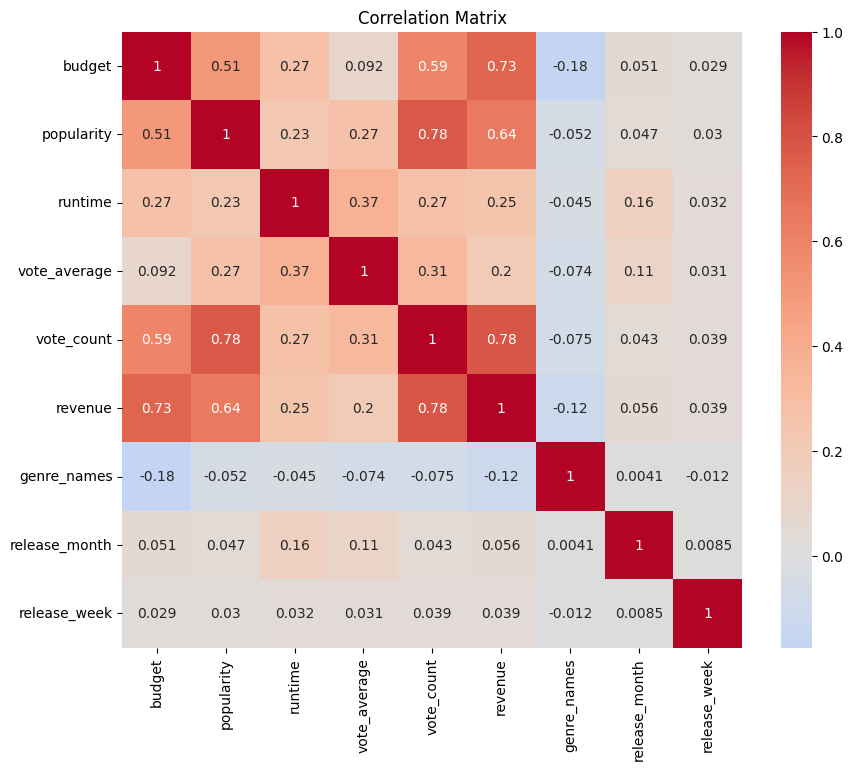

In [25]:
#plot the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


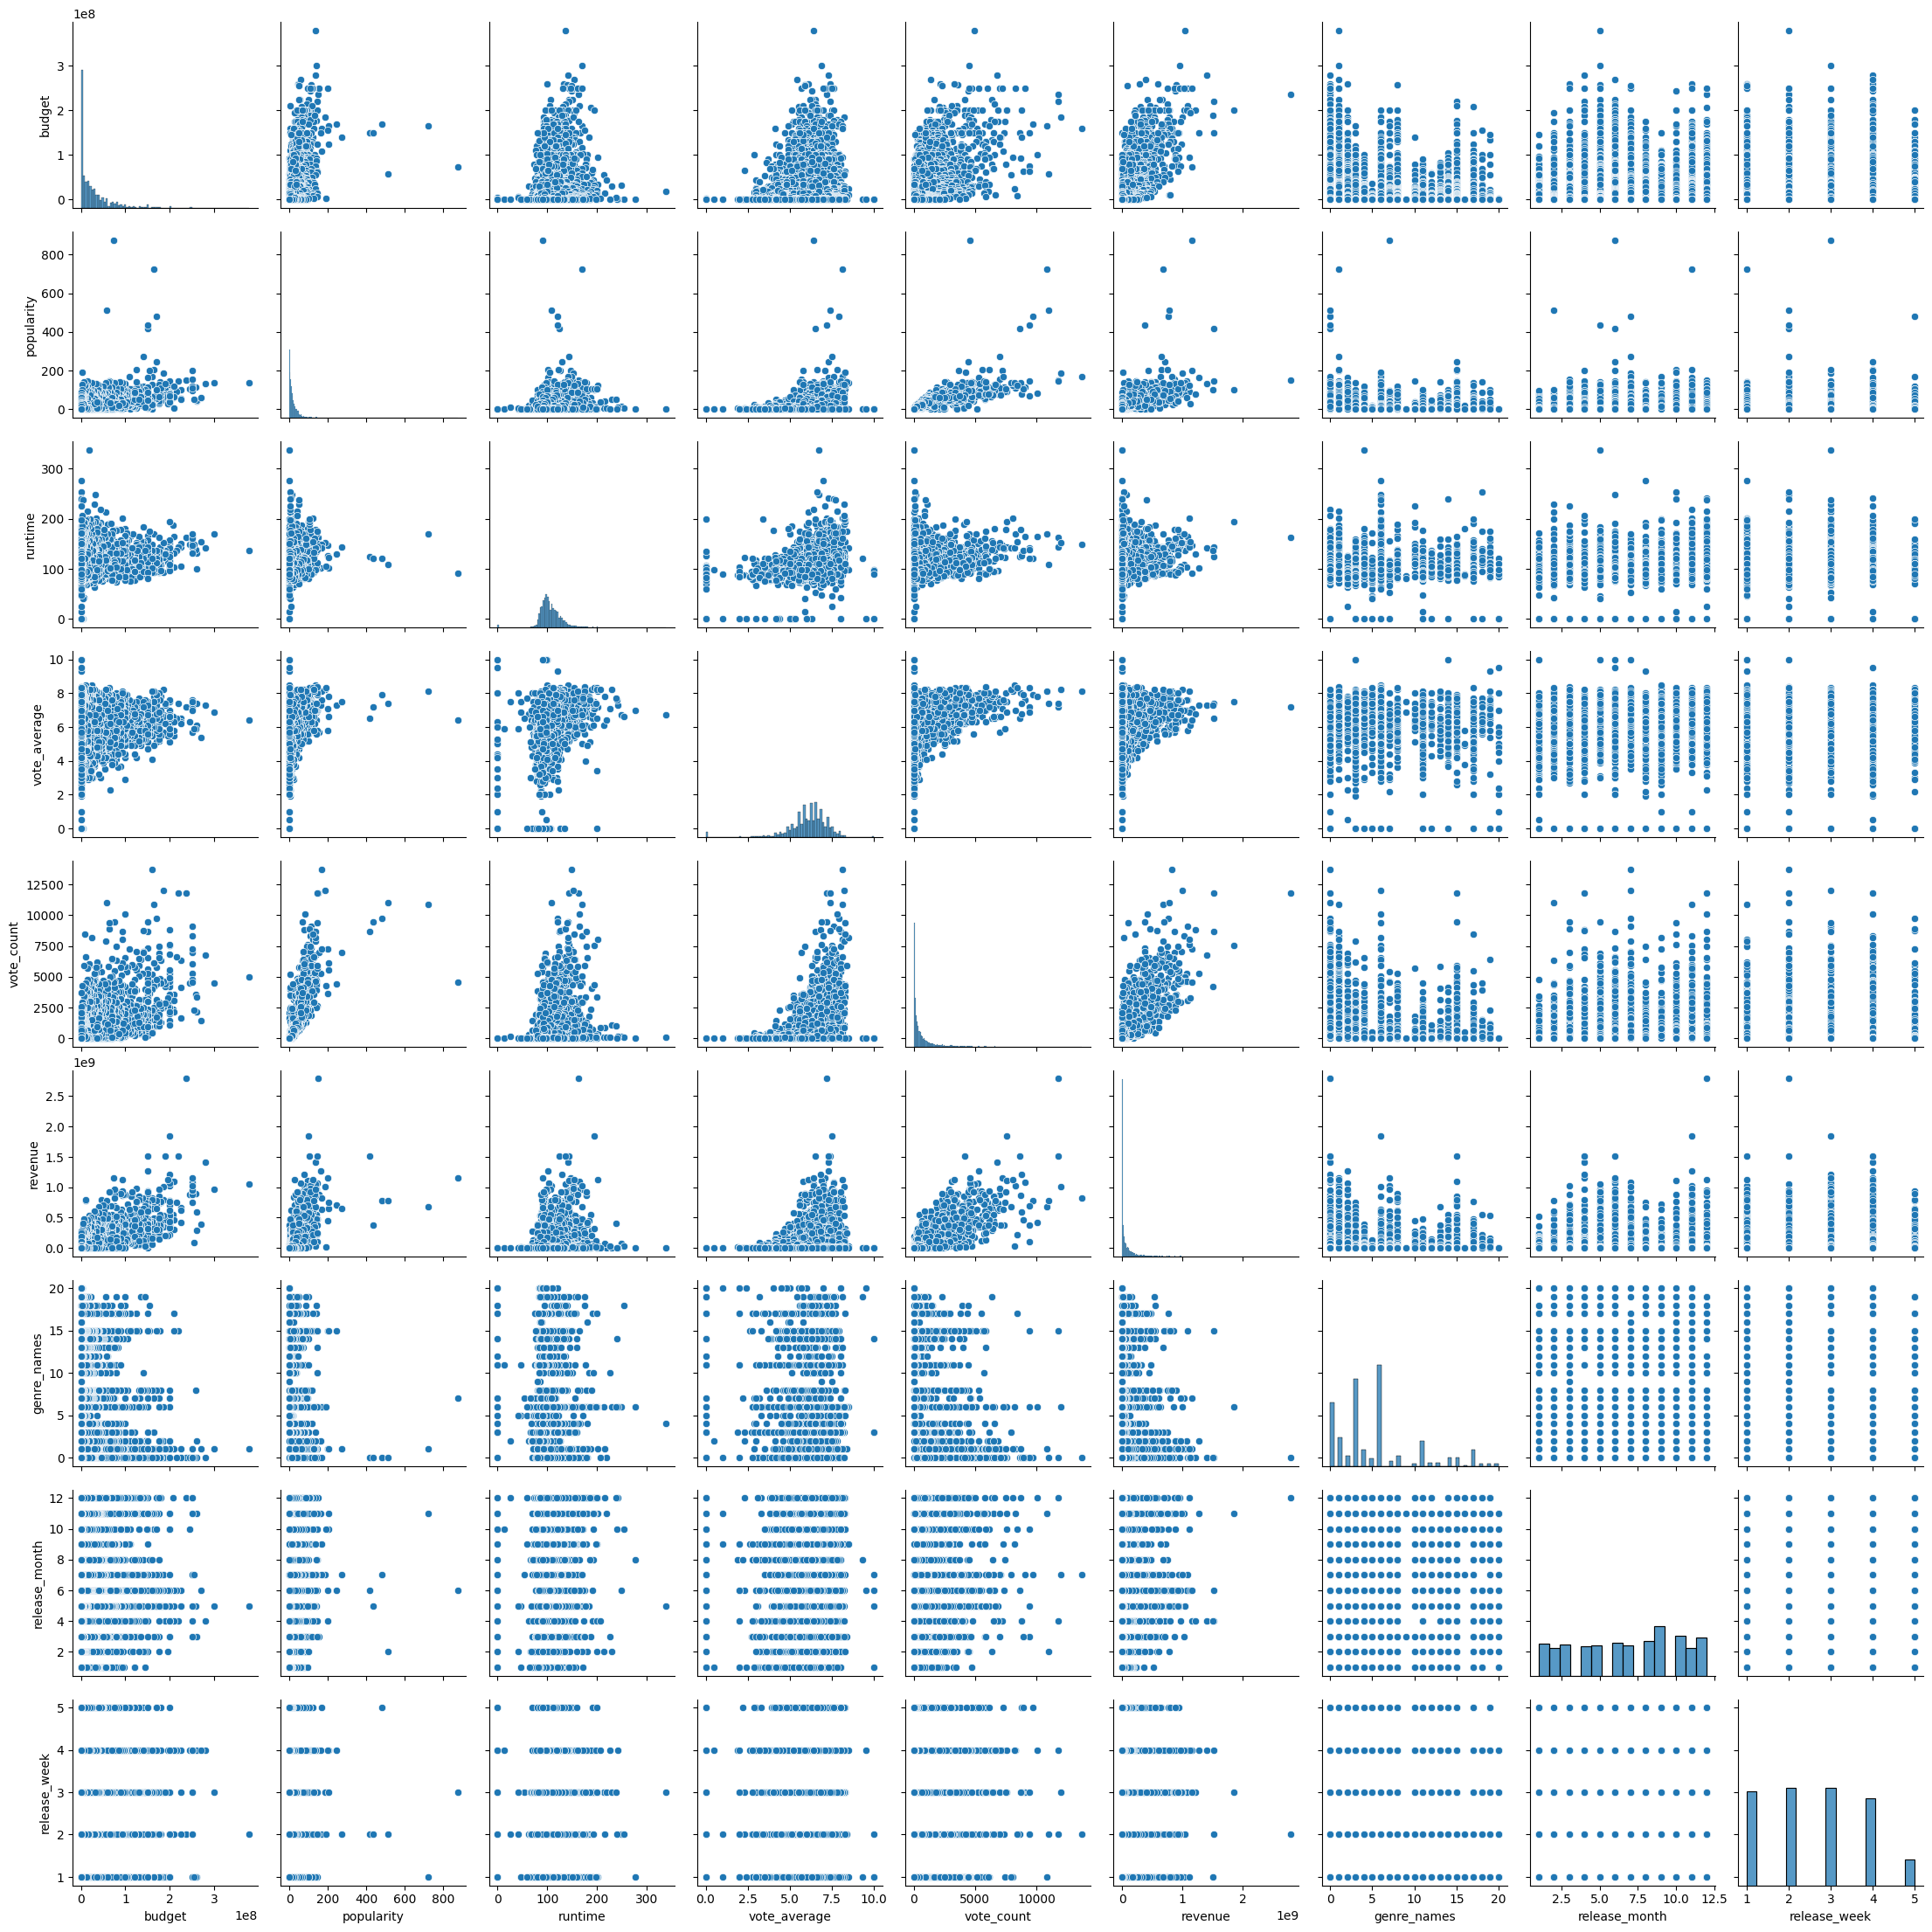

In [26]:
#plot the pairplot
sns.pairplot(df)

In [27]:
# split the data into features and target
X = df.drop(columns=['revenue'])
y = df['revenue']

In [28]:
# split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
#do the feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
X_train

array([[-0.38570131, -0.62897627, -1.00030374, ..., -0.50251919,
        -0.52155749, -0.51793531],
       [-0.41080783, -0.65049675, -0.91290121, ..., -0.50251919,
         0.94032629, -1.33371528],
       [-0.71208602, -0.65451594, -0.82549868, ..., -0.50251919,
        -0.81393425, -1.33371528],
       ...,
       [-0.71208602, -0.42623119, -0.12627845, ..., -0.29293152,
        -0.52155749, -1.33371528],
       [-0.71208602, -0.53211714, -0.47588856, ..., -0.50251919,
        -1.69106452,  1.11362464],
       [ 0.66877234,  0.05098488,  0.52924052, ...,  0.12624382,
         1.23270304,  1.11362464]])

In [31]:
#train the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [32]:
#predict the test set
y_pred = regressor.predict(X_test)

In [33]:
#evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 6172704008747681.00
Root Mean Squared Error: 78566557.83
R^2 Score: 0.77


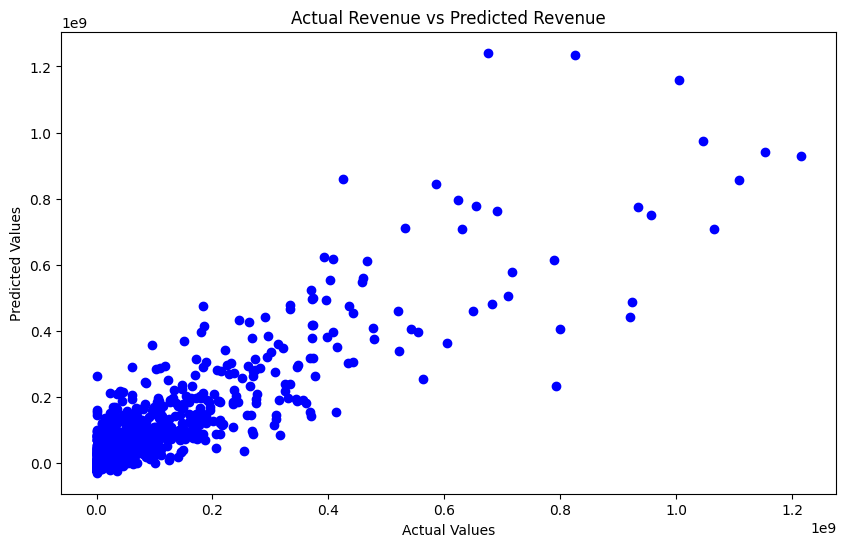

In [34]:
#plot the predicted values against the actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual Revenue vs Predicted Revenue')
plt.show()

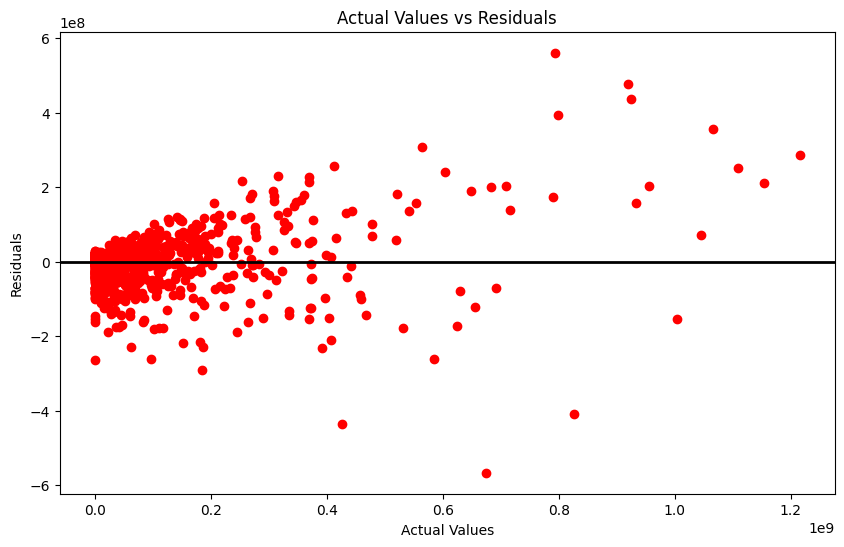

In [35]:
#plot the residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='red')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='black', linewidth=2)
plt.title('Actual Values vs Residuals')
plt.show()

In [36]:
#random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

rf_y_pred = rf_regressor.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_y_pred)

print(f'Mean Squared Error: {rf_mse:.2f}')
print(f'Root Mean Squared Error: {rf_rmse:.2f}')
print(f'R^2 Score: {rf_r2:.2f}')

Mean Squared Error: 7959842658484774.00
Root Mean Squared Error: 89217950.32
R^2 Score: 0.70


In [37]:
#decision tree regressor
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

dt_y_pred = dt_regressor.predict(X_test)

dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, dt_y_pred)

print(f'Mean Squared Error: {dt_mse:.2f}')
print(f'Root Mean Squared Error: {dt_rmse:.2f}')
print(f'R^2 Score: {dt_r2:.2f}')

Mean Squared Error: 22845822681888036.00
Root Mean Squared Error: 151148346.61
R^2 Score: 0.14


In [38]:
#poly reg
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
poly_regressor = LinearRegression()
poly_regressor.fit(X_poly, y_train)

X_test_poly = poly.transform(X_test)
poly_y_pred = poly_regressor.predict(X_test_poly)

poly_mse = mean_squared_error(y_test, poly_y_pred)
poly_rmse = np.sqrt(poly_mse)
poly_r2 = r2_score(y_test, poly_y_pred)

print(f'Mean Squared Error: {poly_mse:.2f}')
print(f'Root Mean Squared Error: {poly_rmse:.2f}')
print(f'R^2 Score: {poly_r2:.2f}')

Mean Squared Error: 5905534469950605.00
Root Mean Squared Error: 76847475.36
R^2 Score: 0.78


In [39]:
#compare the models
models = ['Linear Regression', 'Random Forest', 'Decision Tree', 'Polynomial Regression']
mse_scores = [mse, rf_mse, dt_mse, poly_mse]
rmse_scores = [rmse, rf_rmse, dt_rmse, poly_rmse]
r2_scores = [r2, rf_r2, dt_r2, poly_r2]

model_comparison = pd.DataFrame({
    'Model': models,
    'Mean Squared Error': mse_scores,
    'Root Mean Squared Error': rmse_scores,
    'R^2 Score': r2_scores
})

model_comparison

,Model,Mean Squared Error,Root Mean Squared Error,R^2 Score
0,Linear Regression,6.172704e+15,7.856656e+07,0.767906
1,Random Forest,7.959843e+15,8.921795e+07,0.700709
2,Decision Tree,2.284582e+16,1.511483e+08,0.140996
3,Polynomial Regression,5.905534e+15,7.684748e+07,0.777952


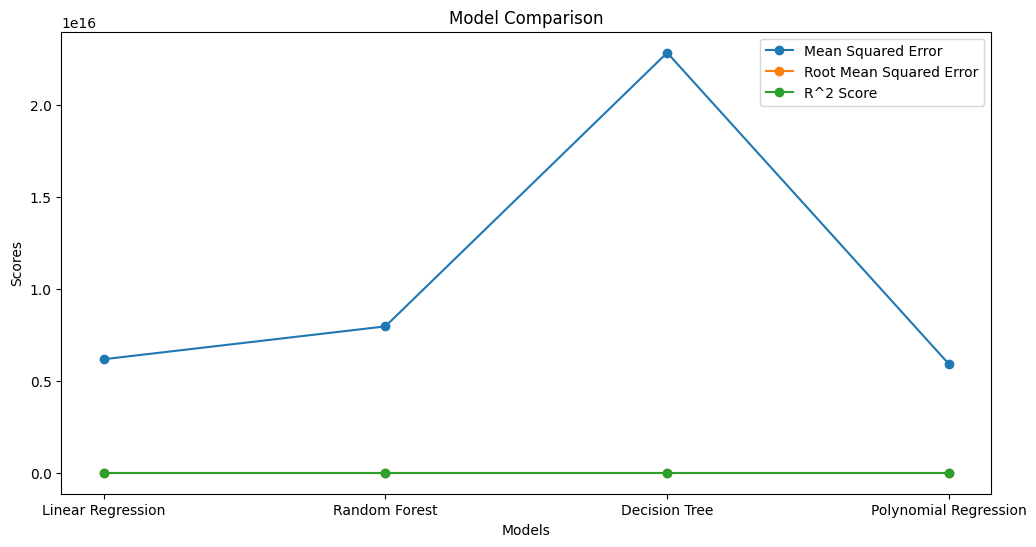

In [40]:
#plot the comparison
plt.figure(figsize=(12, 6))
plt.plot(models, mse_scores, marker='o', label='Mean Squared Error')
plt.plot(models, rmse_scores, marker='o', label='Root Mean Squared Error')
plt.plot(models, r2_scores, marker='o', label='R^2 Score')
plt.title('Model Comparison')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.legend()
plt.show()

In [41]:
#get the highest r2 score
model_comparison[model_comparison['R^2 Score'] == model_comparison['R^2 Score'].max()]['Model'].values[0]


'Polynomial Regression'

In [42]:
#save the model
import joblib
joblib.dump(rf_regressor, 'revenue_prediction_model.pkl')

['revenue_prediction_model.pkl']

In [43]:
#save the label encoder
joblib.dump(le, 'genre_label_encoder.pkl')

['genre_label_encoder.pkl']

In [44]:
df.head()

,budget,popularity,runtime,vote_average,vote_count,revenue,genre_names,release_month,release_week
0,237000000,150.437577,162.0,7.2,11800,2787965087,0,12.0,2.0
1,300000000,139.082615,169.0,6.9,4500,961000000,1,5.0,3.0
2,245000000,107.376788,148.0,6.3,4466,880674609,0,10.0,4.0
3,250000000,112.312950,165.0,7.6,9106,1084939099,0,7.0,3.0
4,260000000,43.926995,132.0,6.1,2124,284139100,0,3.0,1.0


In [45]:
label_encoder = joblib.load('genre_label_encoder.pkl')

input_data = {
    'budget': 150000000,
    'popularity': 150.437577,
    'runtime': 150,
    'vote_average': 7.2,
    'vote_count': 11800,
    'genre_names': 'Action',
    'release_month': 12,
    'release_week': 2
}

input_df = pd.DataFrame([input_data])
input_df['genre_names'] = label_encoder.transform(input_df['genre_names'])
input_df

input_df = sc.transform(input_df)
input_df

array([[ 3.05389132,  4.15952023,  1.88397973,  0.91476983,  9.36506403,
        -1.13128219,  1.5250798 , -0.51793531]])

In [46]:
#load the model
model = joblib.load('revenue_prediction_model.pkl')

#predict the revenue
revenue = model.predict(input_df)
revenue[0]

1931648472.01

In [47]:
#save the scaler
joblib.dump(sc, 'scaler.pkl')

['scaler.pkl']